In [17]:
import numpy as np
import pandas as pd
from scipy import signal as sig
import matplotlib.pyplot as plt
from signalProfiles import binaryProfile, impulse, yearProfile
import json

np.random.seed(0)

## Squared impulses

In [18]:
def abnSquaredImpulseGenerator():
    mode = np.random.randint(0, 6)
    record = {}
    if   mode==0:
        impLocSampled = np.random.randint(0, 500)
        impValSampled = np.random.uniform(0.2, 0.4)
        record['impLoc'] = impLocSampled
        record['impVal'] = impValSampled
        data = binaryProfile(impLoc=impLocSampled, impVal=impValSampled)
    elif mode==1:
        freqFactSampled = np.random.uniform(1.2, 3.0)
        record['freqFact'] = freqFactSampled
        data = binaryProfile(freqFact=freqFactSampled)
    elif mode==2:
        sigmaAnomalySampled = np.random.uniform(0.05, 0.2)
        record['sigmaAnomaly'] = sigmaAnomalySampled
        data = binaryProfile(sigmaAnomaly=sigmaAnomalySampled)
    elif mode==3:
        ampAnomalySampled = np.random.uniform(0.4, 0.9)
        record['ampAnomaly'] = ampAnomalySampled
        data = binaryProfile(ampAnomaly=ampAnomalySampled) 
    elif mode==4:
        nullLocSampled = np.random.randint(0,400)
        nullDurSampled = np.random.randint(10,100)
        record['nullLoc'] = nullLocSampled
        record['nullDur'] = nullDurSampled
        data = binaryProfile(nullLoc=nullLocSampled, nullDur=nullDurSampled)
    elif mode==5:
        offsetVarSampled = np.random.uniform(0.1,0.3)
        record['offsetVar'] = offsetVarSampled
        data = binaryProfile(offsetVar=offsetVarSampled)
    else:
        data = {}
        print('Error')
    return data, record

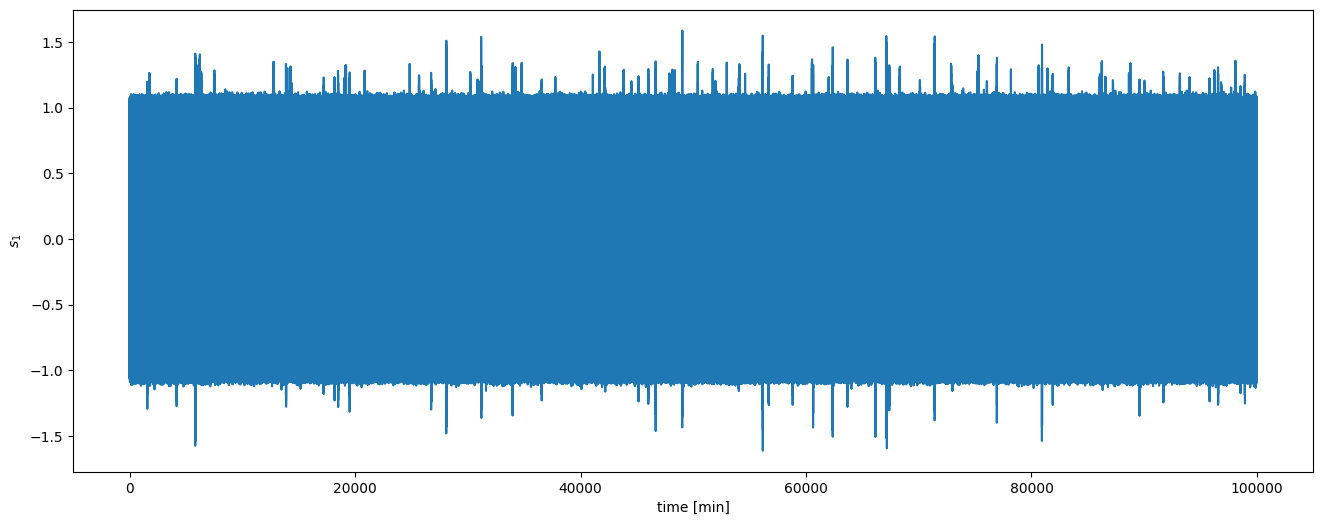

In [19]:
n_profiles = 5000
data = np.zeros(500*n_profiles)
recordData = {}

for n in range(n_profiles):
    abn_index = np.random.rand()
    if abn_index<0.05:
        mod,record = abnSquaredImpulseGenerator()
        recordData[n]=record
    else:
        mod = binaryProfile()
    data[n*500:(n+1)*500] = mod

np.savetxt("squaredImpulseData.csv", data, delimiter=",")
output_file = "squaredImpulseAbnRecords.json"
with open(output_file, 'w') as file:
    json.dump(recordData, file, indent=4)

fig, ax = plt.subplots(figsize=(16, 6))
time = np.linspace(0, 100000, 500*n_profiles, endpoint=False)
plt.plot(time, data)

plt.xlabel('time [min]')
plt.ylabel('$s_1$')
plt.show()

## Gaussian impulses

In [20]:
def abnGaussianImpulseGenerator():
    mode = np.random.randint(0, 5)
    record = {}
    if   mode==0:
        fcAnomalySampled = np.random.uniform(6, 15)
        record['fc'] = fcAnomalySampled
        data = impulse(fc=fcAnomalySampled, bw=.2)
    elif mode==1:
        offsetSampled = np.random.uniform(.2, .5)
        record['offset'] = offsetSampled
        data = impulse(fc=5,  bw=.2, offset=offsetSampled)
    elif mode==2:
        impLocSampled = np.random.randint(0,200)
        impValSampled = np.random.uniform(.2, .5)
        record['impLoc'] = impLocSampled
        record['impVal'] = impValSampled
        data = impulse(fc=5,  bw=.2, impLoc=impLocSampled, impVal=impValSampled) 
    elif mode==3:
        noiseLocSampled = np.random.randint(0,110)
        noiseDurSampled = np.random.randint(20,80)
        record['noiseLoc'] = noiseLocSampled
        record['noiseDur'] = noiseDurSampled
        data = impulse(fc=5,  bw=.2, noiseLoc=noiseLocSampled, noiseDur=noiseDurSampled)
    elif mode==4:
        nullLocSampled = np.random.randint(0,110)
        nullDurSampled = np.random.randint(20,80)
        record['nullLoc'] = nullLocSampled
        record['nullDur'] = nullDurSampled
        data = impulse(fc=5,  bw=.2, nullLoc=nullLocSampled,  nullDur=nullDurSampled)
    else:
        data = {}
        print('Error')
    return data, record

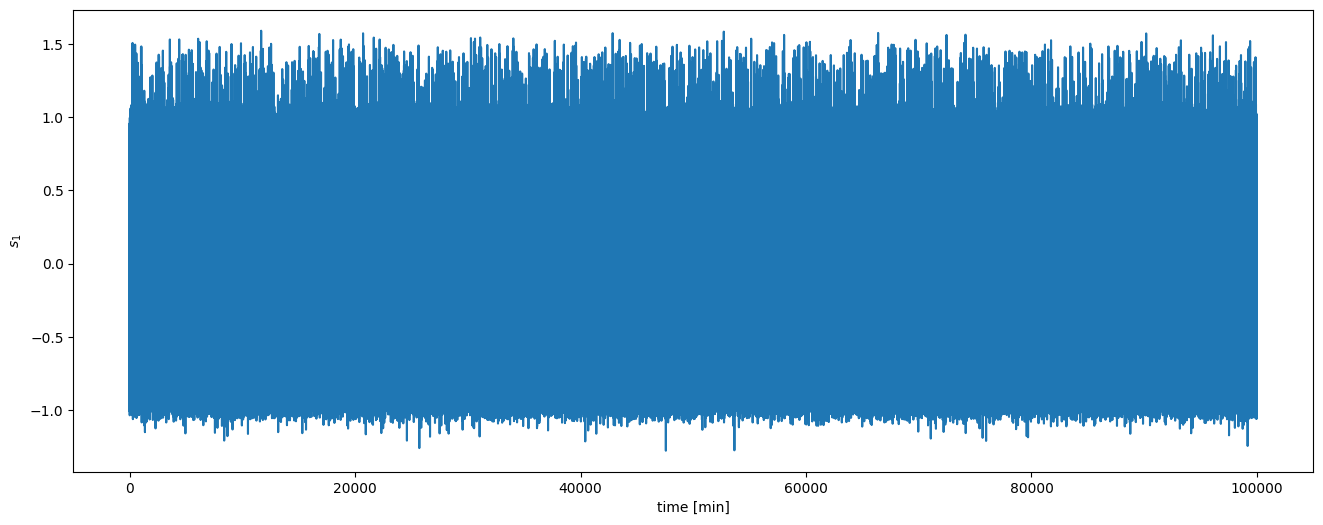

In [21]:
n_profiles = 10000
data = np.zeros(200*n_profiles)
recordData = {}

for n in range(n_profiles):
    abn_index = np.random.rand()
    if abn_index<0.5:
        mod,record = abnGaussianImpulseGenerator()
        recordData[n]=record
    else:
        mod = impulse(fc=5,  bw=.2)
    data[n*200:(n+1)*200] = mod

np.savetxt("gaussianImpulseData.csv", data, delimiter=",")
output_file = "gaussianImpulseAbnRecords.json"
with open(output_file, 'w') as file:
    json.dump(recordData, file, indent=4)

fig, ax = plt.subplots(figsize=(16, 6))
time = np.linspace(0, 100000, 200*n_profiles, endpoint=False)
plt.plot(time, data)

plt.xlabel('time [min]')
plt.ylabel('$s_1$')
plt.show()

## Sinusoidal impulses

In [22]:
def abnSinusoidalImpulseGenerator():
    mode = np.random.randint(0, 5)
    record = {}
    if   mode==0:
        impLocSampled = np.random.randint(0,365)
        impFacSampled = np.random.uniform(1.4, 2.0)
        record['impLoc'] = impLocSampled
        record['impFac'] = impFacSampled
        data = yearProfile(impLoc=impLocSampled, impFac=impFacSampled)
    elif mode==1:
        freezeLocSampled = np.random.randint(0,200)
        freezeDurSampled = np.random.randint(30,160)
        record['freezeLoc'] = freezeLocSampled
        record['freezeDur'] = freezeDurSampled
        data = yearProfile(freezeLoc=freezeLocSampled, freezeDur=freezeDurSampled)
    elif mode==2:
        offsetLocSampled = np.random.randint(0,200)
        offsetDurSampled = np.random.randint(30,160)
        record['offsetLoc'] = offsetLocSampled
        record['offsetDur'] = offsetDurSampled
        data = yearProfile(offsetLoc=offsetLocSampled, offsetDur=offsetDurSampled) 
    elif mode==3:
        noiseLocSampled = np.random.randint(0,200)
        noiseDurSampled = np.random.randint(30,160)        
        record['noiseLoc'] = noiseLocSampled
        record['noiseDur'] = noiseDurSampled
        data = yearProfile(noiseLoc=noiseLocSampled, noiseDur=noiseDurSampled)
    elif mode==4:
        driftLocSampled  = np.random.randint(0,100)
        driftDurSampled  = np.random.randint(150,260) 
        driftFactSampled = np.random.uniform(100, 500)
        record['driftLoc']  = driftLocSampled
        record['driftDur']  = driftDurSampled
        record['driftFact'] = driftFactSampled
        data = yearProfile(driftLoc=driftLocSampled,  driftDur=driftDurSampled, driftFact=driftFactSampled)
    else:
        data = {}
        print('Error')
    return data, record

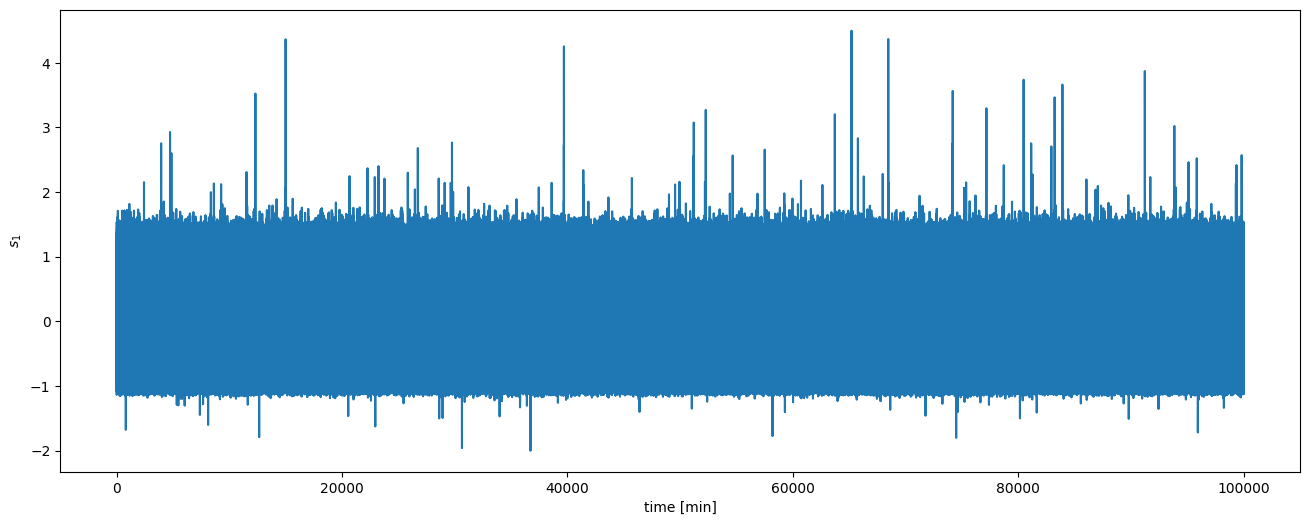

In [23]:
n_profiles = 10000
data = np.zeros(365*n_profiles)
recordData = {}

for n in range(n_profiles):
    abn_index = np.random.rand()
    if abn_index<0.05:
        mod,record = abnSinusoidalImpulseGenerator()
        recordData[n]=record
    else:
        mod = yearProfile()
    data[n*365:(n+1)*365] = mod

np.savetxt("sinusoidalImpulseData.csv", data, delimiter=",")
output_file = "sinusoidalImpulseAbnRecords.json"
with open(output_file, 'w') as file:
    json.dump(recordData, file, indent=4)

fig, ax = plt.subplots(figsize=(16, 6))
time = np.linspace(0, 100000, 365*n_profiles, endpoint=False)
plt.plot(time, data)

plt.xlabel('time [min]')
plt.ylabel('$s_1$')
plt.show()